In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cv2

from shapely.geometry import Point, LineString, Polygon
from shapely.ops import unary_union

import os
os.chdir("../../")

import src.circle_detection.hough_circle_detection
import src.circle_detection.yolo5_circle_detection

%matplotlib inline

In [2]:
filename_to_analysis = "LB Jun lambda 5 2"

In [3]:
def get_shapley_union_of_circles(circles):
    # creates shapely circles and returns union of all circles
    shapley_circles = []
    for circle in circles:
        x, y, r = circle
        shapley_circles.append(Point(x,y).buffer(r))
    return unary_union(shapley_circles)


In [4]:
def get_circles_from_file(filename):
    with open(filename,'r') as f:
        circles = f.readlines()[1:]
        circles = [circle.replace("\n", "") for circle in circles]

        return_circles = []
        
        for circle in circles:
            x, y, r, label = circle.split(", ")
            return_circles.append((float(x), float(y), float(r)))
        
        return return_circles

In [5]:
def intersection_over_union(shape1, shape2):
    # calculate IoU for two shapely files
    return shape1.intersection(shape2).area/shape1.union(shape2).area

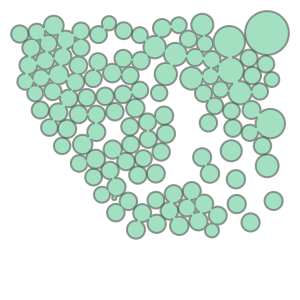

In [6]:
handlabeled_circles = get_circles_from_file(f"report_analysis/circle_detection_comparison/{filename_to_analysis}.txt")

handlabeled_circles_union = get_shapley_union_of_circles(handlabeled_circles)

handlabeled_circles_union

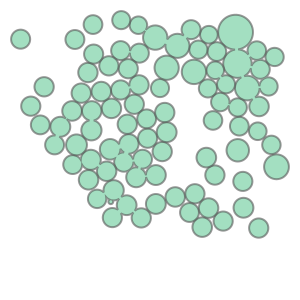

In [7]:
hough_circles = src.circle_detection.hough_circle_detection.hough_circle_detection(f"report_analysis/circle_detection_comparison/{filename_to_analysis}.jpg")

hough_circles_union = get_shapley_union_of_circles(hough_circles[0])

hough_circles_union

In [8]:
intersection_over_union(handlabeled_circles_union, hough_circles_union)

0.6824321784831555

YOLOv5 🚀 a296bfb torch 1.10.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients


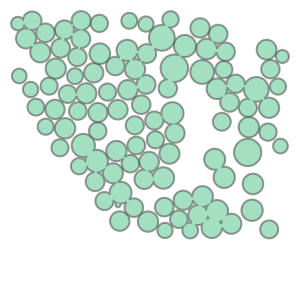

In [9]:
yolov5_circles = src.circle_detection.yolo5_circle_detection.yolo5_circle_detection(f"report_analysis/circle_detection_comparison/{filename_to_analysis}.jpg", device='cpu')

yolov5_circles_union = get_shapley_union_of_circles(yolov5_circles[0])

yolov5_circles_union

In [10]:
intersection_over_union(handlabeled_circles_union, yolov5_circles_union)

0.6880332744389298

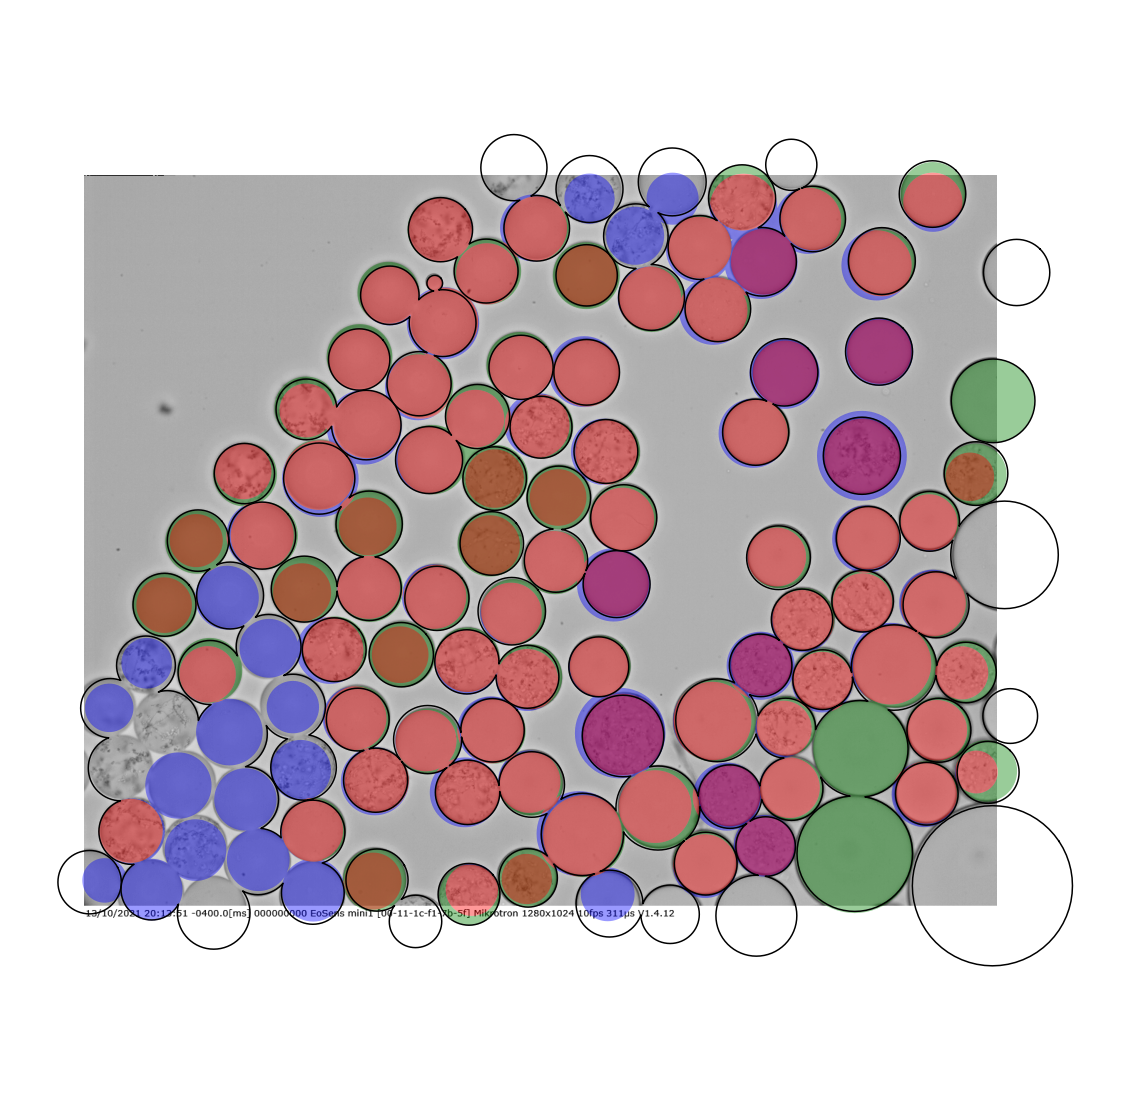

In [11]:
fig, axs = plt.subplots(figsize=(20,20))
axs.set_aspect('equal', 'datalim')

img = plt.imread(f"report_analysis/circle_detection_comparison/{filename_to_analysis}.jpg")

axs.imshow(img, cmap='gray')


for geom in handlabeled_circles_union.geoms:    
    xs, ys = geom.exterior.xy    
    axs.plot(xs, ys, color="black")

for geom in yolov5_circles_union.difference(hough_circles_union).geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.4, fc='blue', ec='none')
    
for geom in hough_circles_union.difference(yolov5_circles_union).geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.4, fc='green', ec='none')
    
for geom in hough_circles_union.intersection(yolov5_circles_union).geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.4, fc='red', ec='none')
    
axs.axis('off')

plt.savefig(f"{filename_to_analysis}.png")